# Fall Prep Notebook 6
## Forecasting The Bachelorette and Pumpkin Spice II

This notebook has a few exercises that can serve as a primer for what to expect in the `Fall Problem Session 6` notebook. These exercises will touch upon the basic python, `pandas`, `numpy`, `matplotlib` and some supervised learning basic techniques that you may want a refresher on prior to starting `Fall Problem Session 6`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from seaborn import set_style
from datetime import datetime

set_style("whitegrid")

#### 1. Loading `pumpkin_spice.csv`

Load `pumpkin_spice.csv` using `.read_csv`. When you read in the data pass the `Month` column as an argument to `parse_dates`.

In [2]:
pumpkin = pd.read_csv('../../Data/pumpkin_spice.csv',parse_dates=['Month'])

In [3]:
pumpkin.tail()

,Month,interest_level
220,2022-05-01,4
221,2022-06-01,4
222,2022-07-01,9
223,2022-08-01,88
224,2022-09-01,95


#### 2. Train test split

Make a train test split of the data from <b>1.</b>. Set the test set to be all observations on or after February 1, 2019.

In [4]:
p_train = pumpkin.loc[pumpkin.Month < datetime(2019,2,1)].copy()
p_test = pumpkin.drop(p_train.index)

#### 3. Time series cross-validation

Perform 7-fold cross-validation on the training set, use a test set size of 5.

In [5]:
from sklearn.model_selection import TimeSeriesSplit

In [6]:
cv = TimeSeriesSplit(7,test_size = 5)

#### 4. Naive model

Record the mean squared error of the naive model predicting `interest_level` for each of the cross-validation splits from <b>3.</b>

In [7]:
from sklearn.metrics import mean_squared_error

In [16]:
mses = np.zeros(7)

i=0
for train_index,test_index in cv.split(p_train):
    mses[i] = mean_squared_error(p_train.interest_level.values[train_index][-1]*np.ones(5),
                                 p_train.interest_level.values[test_index])
                                 
    i += 1

In [17]:
mses

array([4.0000e-01, 3.3722e+03, 1.0120e+02, 2.9292e+03, 3.7732e+03,
       3.0500e+02, 9.2260e+02])

#### 5. Yet another plot

Use the training data to plot the `interest_level` against the `Month` as a solid blue line with each observation marked with a point. Do the same for the training data but with a red dotted line. Finally plot the forecast from the naive model as red "X"s. Be sure to label your plot.

Text(0, 0.5, 'Pumpkin Interest Level')

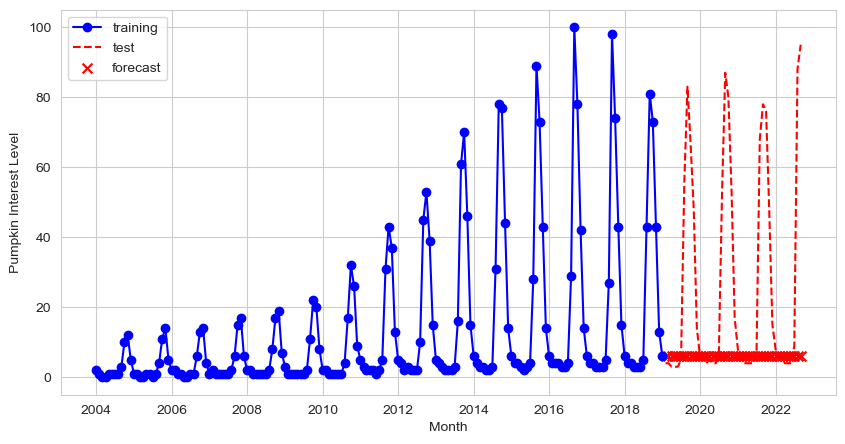

In [39]:
plt.figure(figsize=(10,5))
plt.plot(p_train.Month,p_train.interest_level,'-ob',label='training')
plt.plot(p_test.Month,p_test.interest_level,'--r',label='test')
plt.scatter(p_test.Month,p_train.interest_level.values[-1]*np.ones(len(p_test)),marker='x',color='r',s=50,label='forecast')
plt.legend()
plt.xlabel('Month')
plt.ylabel('Pumpkin Interest Level')

--------------------------

This notebook was written for the Erd&#337;s Institute C&#337;de Data Science Boot Camp by Matthew Osborne, Ph. D., 2022.

Any potential redistributors must seek and receive permission from Matthew Tyler Osborne, Ph.D. prior to redistribution. Redistribution of the material contained in this repository is conditional on acknowledgement of Matthew Tyler Osborne, Ph.D.'s original authorship and sponsorship of the Erdős Institute as subject to the license (see License.md)